<a href="https://colab.research.google.com/github/haninemerzougui/Bisecting-K-Means-Algorithem-using-Foalt-DataBase-/blob/main/image_to_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
!pip install -U -r yolov5/requirements.txt  # install dependencies

%cd /content/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16114, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 16114 (delta 8), reused 10 (delta 1), pack-reused 16089
Receiving objects: 100% (16114/16114), 14.84 MiB | 25.16 MiB/s, done.
Resolving deltas: 100% (11027/11027), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 60.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.5/285.5 kB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 67.8 MB/s eta 0:00:00
     ━━

/content/yolov5


In [ ]:
import torch
from IPython.display import Image  # for displaying images

print('torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

torch 2.1.2+cu121 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15102MB, multi_processor_count=40)


In [ ]:
pip install opencv-python

In [ ]:
pip install --upgrade numpy

In [ ]:
!pip uninstall torch torchvision
!pip install torch torchvision

Found existing installation: torch 2.1.2
Uninstalling torch-2.1.2:
  Would remove:
    /usr/local/bin/convert-caffe2-to-onnx
    /usr/local/bin/convert-onnx-to-caffe2
    /usr/local/bin/torchrun
    /usr/local/lib/python3.10/dist-packages/functorch/*
    /usr/local/lib/python3.10/dist-packages/nvfuser/*
    /usr/local/lib/python3.10/dist-packages/torch-2.1.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/torch/*
    /usr/local/lib/python3.10/dist-packages/torchgen/*
Proceed (Y/n)? Y
  Successfully uninstalled torch-2.1.2
Found existing installation: torchvision 0.16.2
Uninstalling torchvision-0.16.2:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/torchvision-0.16.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/torchvision.libs/libcudart.7ec1eba6.so.12
    /usr/local/lib/python3.10/dist-packages/torchvision.libs/libjpeg.ceea7512.so.62
    /usr/local/lib/python3.10/dist-packages/torchvision.libs/libnvjpeg.f00ca762.so.12
    /usr/local/lib/python3.10/dist-p

In [ ]:
pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 2.5 MB/s eta 0:00:00


In [ ]:
pip install torch torchvision

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-12-26 Python-3.10.12 torch-2.1.2+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5n summary: 213 layers, 1867405 parameters, 0 gradients, 4.5 GFLOPs
Adding AutoShape... 


Label: person, Confidence: 0.42, Bounding Box: (0.2506474554538727, 0.36670759320259094)-(0.5845929980278015, 0.9847003221511841)


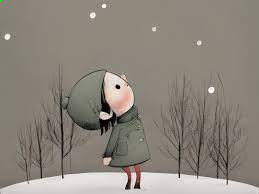

In [ ]:
import cv2
import torch
from google.colab.patches import cv2_imshow
model = torch.hub.load('ultralytics/yolov5', 'yolov5n')  # Replace 'yolov5s' with your chosen version
image = cv2.imread('/content/giel.jpg')
results = model(image)
boxes = results.xyxyn[0].tolist()
for box in boxes:
    x1, y1, x2, y2, conf, cls = box
label = results.names[int(cls)]
for box in results.xyxyn[0].tolist():
    x1, y1, x2, y2, conf, cls = box
    label = results.names[int(cls)]
    print(f"Label: {label}, Confidence: {conf:.2f}, Bounding Box: ({x1}, {y1})-({x2}, {y2})")
    cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)  # Green rectangle
    cv2.putText(image, f"{label}: {conf:.2f}", (int(x1), int(y1) - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)  # Label above box
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
pip install transformers


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Class: mosque, Probability: 0.9623
Class: palace, Probability: 0.0053
Class: seashore, Probability: 0.0056


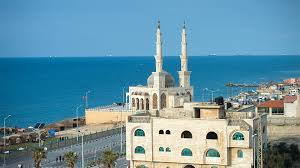

Text Description: The image likely contains mosque, palace, seashore.
Generated Story: Write a short story about The image likely contains mosque, palace, seashore..


In [47]:
import json
from urllib import request
import torch
import cv2
from torchvision import models, transforms
from PIL import Image
from google.colab.patches import cv2_imshow
import torchvision.models.resnet as resnet_utils  # Import for ImageNet class names
from nltk.corpus import wordnet
import nltk
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

# Download ImageNet labels
LABELS_URL = 'https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json'
labels_path = '/content/imagenet-simple-labels.json'
request.urlretrieve(LABELS_URL, labels_path)
with open(labels_path) as f:
    imagenet_classes = json.load(f)

# Download NLTK WordNet data
nltk.download('wordnet')

model = models.resnet50(pretrained=True)
model.eval()

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

image_path = '/content/160.jpg'
image = Image.open(image_path).convert('RGB')
image_tensor = preprocess(image).unsqueeze(0)

with torch.no_grad():
    outputs = model(image_tensor)
    all_probs = torch.nn.functional.softmax(outputs, dim=1).squeeze(0).tolist()

# Option 1: Print or store top 3 predicted classes with probabilities
top_3_probs = sorted(all_probs, reverse=True)[:3]  # Get the top 3 probabilities
top_3_classes = [(imagenet_classes[idx], prob) for idx, prob in enumerate(all_probs) if prob in top_3_probs]
for label, prob in top_3_classes:
    print(f"Class: {label}, Probability: {prob:.4f}")

# Option 2: Display image with bounding boxes and labels (assuming model outputs bounding boxes)
results = outputs  # Access bounding boxes directly
image = cv2.imread(image_path)  # Load image for OpenCV
for box in results.tolist():
    x1, y1, x2, y2, conf, cls = box[:6]
    label = imagenet_classes[int(cls)]
    if conf in top_3_probs:
        cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
        cv2.putText(image, f"{label}: {conf:.2f}", (int(x1), int(y1) - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Option 3: Generate text description for classes with probabilities higher than 0.5
description = "The image likely contains "
for label, prob in top_3_classes:
    synonyms = wordnet.synsets(label)
    if len(synonyms) > 0:
        description += f"{synonyms[0].lemmas()[0].name()}, "
    else:
        description += f"{label}, "
description = description[:-2] + "."
print("Text Description:", description)

# Load text generation model and tokenizer
model_name = "facebook/bart-base"  # Choose a suitable model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

# Create prompt
prompt = "Write a short story about " + description + "."
def generate_text(input_text, max_length=50, num_beams=4, length_penalty=2.0, early_stopping=True):
    # Tokenize input text
    input_ids = tokenizer.encode(input_text, return_tensors="pt")

    # Generate text using the BART model
    output_ids = model.generate(input_ids, max_length=max_length, num_beams=num_beams, length_penalty=length_penalty, early_stopping=early_stopping)
    output_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)

    return output_text
# Generate text
input_ids = tokenizer.encode(prompt, return_tensors="pt")
output = model.generate(input_ids, max_length=500, num_beams=5)  # Adjust parameters as needed
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
generated_text = generate_text(prompt)

print("Generated Story:", generated_text)